In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# import dataset
df = pd.read_csv('credit_risk_dataset.csv')
print(df.head(5))

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [3]:
# Data description:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.shape

(32581, 12)

In [6]:
# Finding the number unique values in 4 categorical columns
non_numeric = df.select_dtypes("object")
for col in non_numeric.columns:
  print("Number of unique values in " + str(col) + " column: ", non_numeric[col].nunique())

Number of unique values in person_home_ownership column:  4
Number of unique values in loan_intent column:  6
Number of unique values in loan_grade column:  7
Number of unique values in cb_person_default_on_file column:  2


In [7]:
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,16446
MORTGAGE,13444
OWN,2584
OTHER,107


In [8]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,6453
MEDICAL,6071
VENTURE,5719
PERSONAL,5521
DEBTCONSOLIDATION,5212
HOMEIMPROVEMENT,3605


In [9]:
df['loan_grade'].value_counts()

,count
loan_grade,
A,10777
B,10451
C,6458
D,3626
E,964
F,241
G,64


In [10]:
df['cb_person_default_on_file'].value_counts()

,count
cb_person_default_on_file,
N,26836
Y,5745


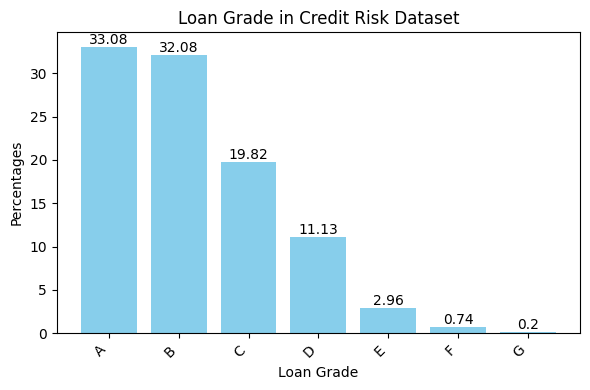

In [11]:
# Data visualize
# Calculate the percentage of occurrences for Loan Grade
loan_grade = df['loan_grade'].value_counts()
ld_percentages = loan_grade / loan_grade.sum() * 100
# Plot the loan grade
plt.figure(figsize=(6, 4))
bars = plt.bar(ld_percentages.index, ld_percentages, color='skyblue')
# Add text annotations with the exact numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.xlabel('Loan Grade')
plt.ylabel('Percentages')
plt.title('Loan Grade in Credit Risk Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


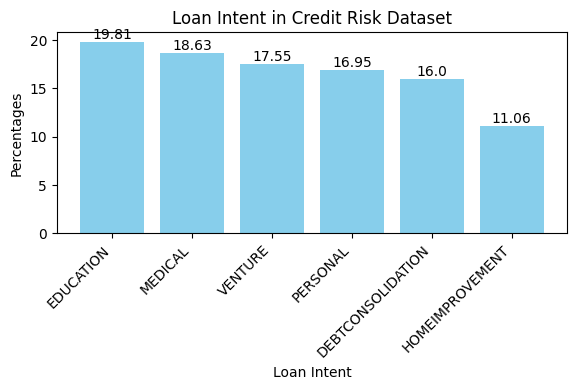

In [12]:
# Calculate the percentage of occurrences for Loan Intent
loan_intent = df['loan_intent'].value_counts()
lt_percentages = loan_intent / loan_intent.sum() * 100
# Plot the loan grade
plt.figure(figsize=(6, 4))
bars = plt.bar(lt_percentages.index, lt_percentages, color='skyblue')
# Add text annotations with the exact numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.xlabel('Loan Intent')
plt.ylabel('Percentages')
plt.title('Loan Intent in Credit Risk Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

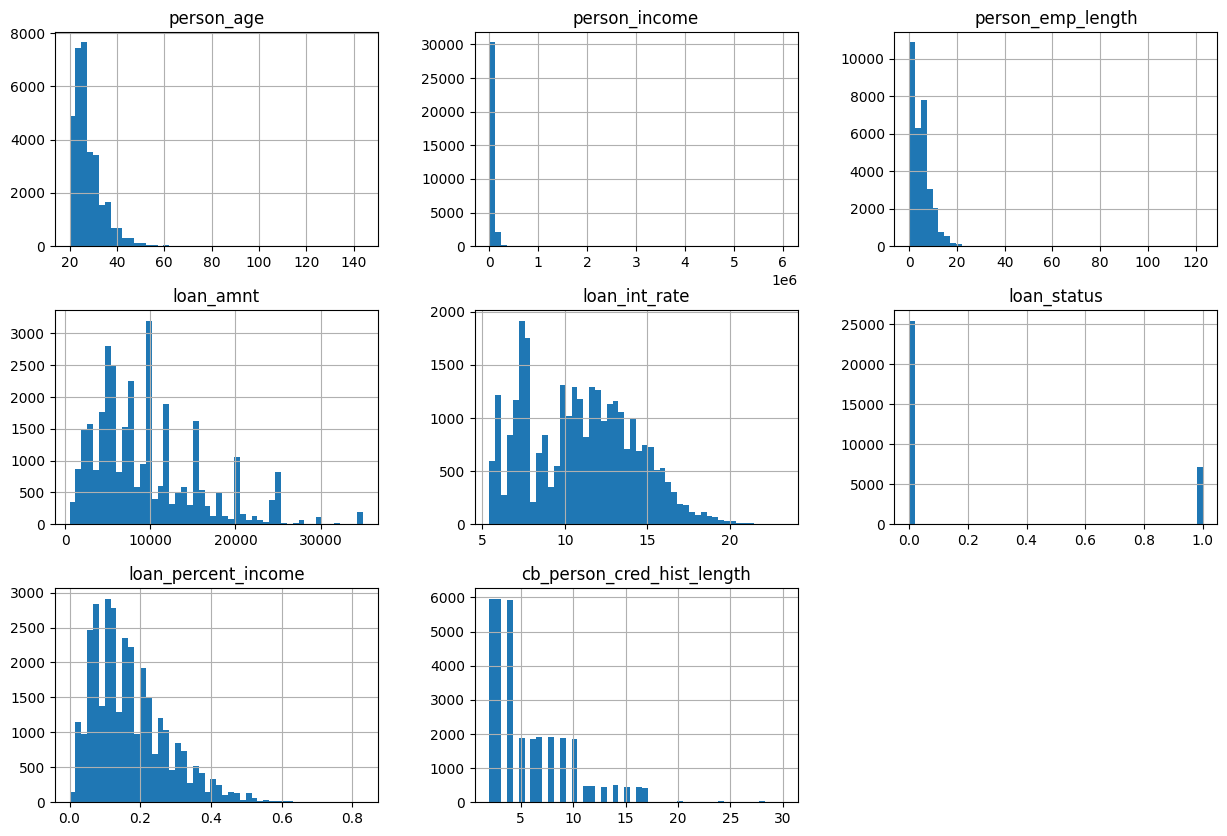

In [13]:
#Histogram
%matplotlib inline
df.hist(bins=50, figsize = (15,10))
plt.show()

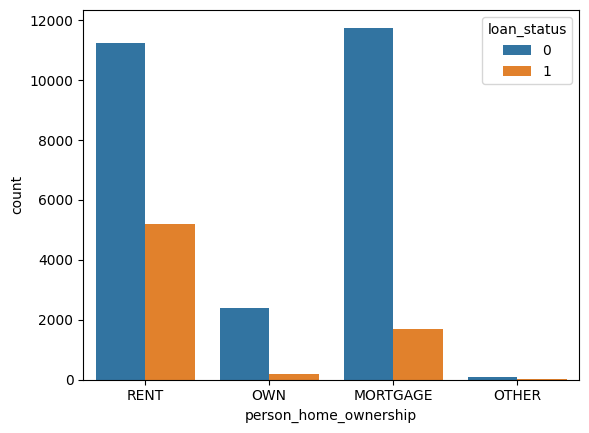

In [14]:
# Relationship between personal home ownership and loan status
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.show()

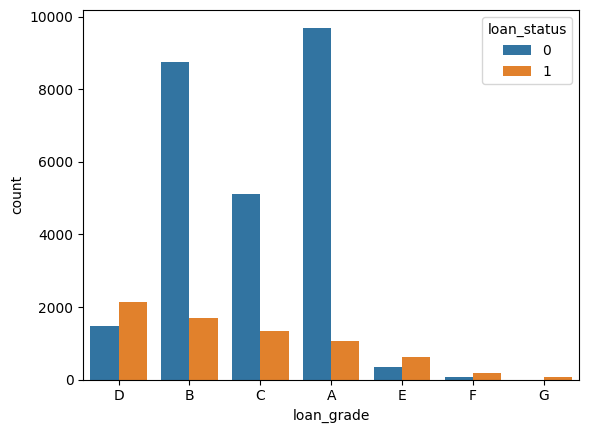

In [15]:
# Relationship between loan grade and loan status
sns.countplot(x='loan_grade', hue='loan_status', data=df)
plt.show()

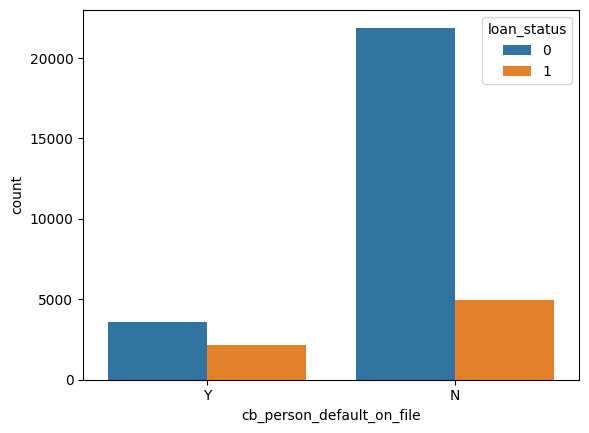

In [16]:
# Relationship between historical default and loan status
sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=df)
plt.show()

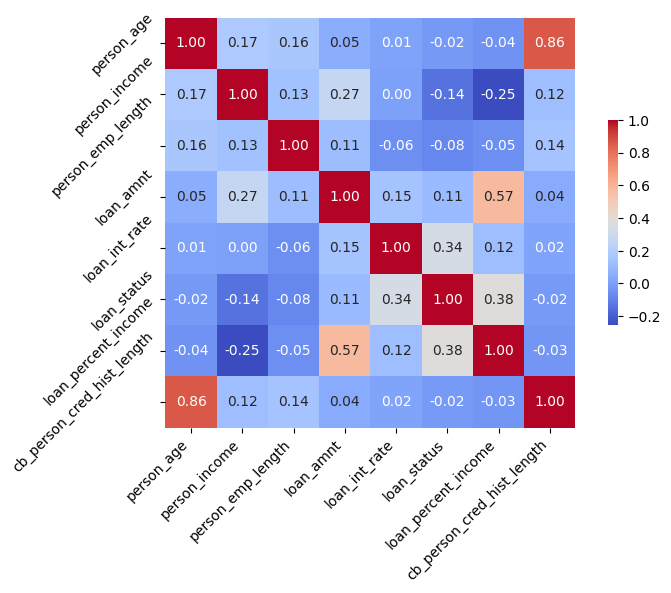

In [17]:
# Heat map
# Create the correlation matrix
numeric_columns = df.select_dtypes(include='number')
corr_matrix1 = numeric_columns.corr()
# Set up the plot figure
plt.figure(figsize=(8, 6))
# Create the heatmap with annotations, formatting, and color map
sns.heatmap(corr_matrix1, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Rotate y-axis labels for better readability
plt.yticks(rotation=45)
# Adjust layout for better visualization
plt.tight_layout()
# Show the plot
plt.show()

In [18]:
# Data processing:
# Check number null value
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [19]:
# Cleaning data:
threshold = len(df) * 0.05
cols_to_drop = df.columns[df.isna().sum() <= threshold]
df.dropna(subset=cols_to_drop, inplace=True)
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3048
loan_status,0
loan_percent_income,0


In [20]:
df.shape

(31686, 12)

In [21]:
df['person_age'].value_counts()

,count
person_age,
23,3774
22,3519
24,3455
25,2952
26,2420
27,2095
28,1805
29,1646
30,1266


In [22]:
df = df.drop(df[df['person_age'] > 100].index)

In [23]:
df.duplicated().sum()

157

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(31524, 12)

In [26]:
# Fill null values in 'loan_int_rate' with the smallest non-null value
min_loan_int_rate = df['loan_int_rate'].min()
df['loan_int_rate'].fillna(min_loan_int_rate, inplace=True)
df.isna().sum()

<ipython-input-26-8868ae8a6f7f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(min_loan_int_rate, inplace=True)


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [27]:
# Encoder:
# OneHotEncode for loan_grade, person_home_ownership,loan_intent, cb_person_default_on_file
from sklearn.preprocessing import OneHotEncoder
# Data for one-hot encoding
df_onehot = df[['loan_grade', 'person_home_ownership','loan_intent', 'cb_person_default_on_file']]
# Initialize the OneHotEncoder
one_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit-transform on combined data
encoded_data = one_encoder.fit_transform(df_onehot)
# Convert the encoded arrays back to DataFrames
column_names = [f"title_{value}" for value in one_encoder.get_feature_names_out()]
one_hot_df = pd.DataFrame(encoded_data, columns=column_names, index=df_onehot.index)
# Concatenate the one-hot encoded DataFrames with the original DataFrames
df = pd.concat([df, one_hot_df], axis=1)

In [28]:
from sklearn.model_selection import train_test_split
# Split data
X = df.drop(columns=['loan_grade', 'person_home_ownership','loan_intent', 'cb_person_default_on_file','loan_status'])
y = df['loan_status']
# train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Build ROC curve and Confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
def print_plot(model, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred)

    print(report)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC-ROC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1254
           1       0.96      0.66      0.78       323

    accuracy                           0.92      1577
   macro avg       0.94      0.82      0.87      1577
weighted avg       0.93      0.92      0.92      1577



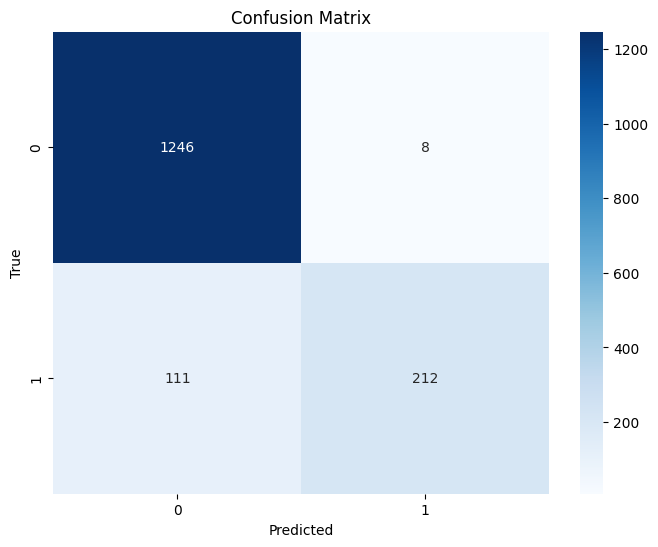

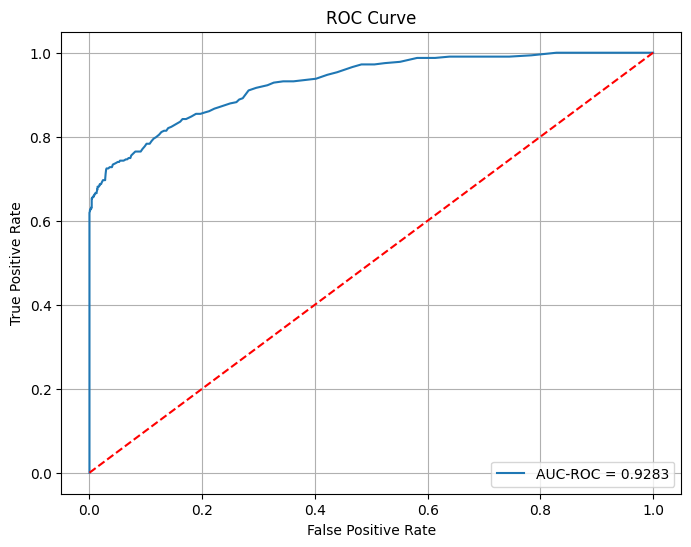

In [31]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=250, random_state=40)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
print_plot(rf_model, y_pred_rf, y_prob_rf)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1254
           1       0.75      0.53      0.62       323

    accuracy                           0.87      1577
   macro avg       0.82      0.74      0.77      1577
weighted avg       0.86      0.87      0.86      1577



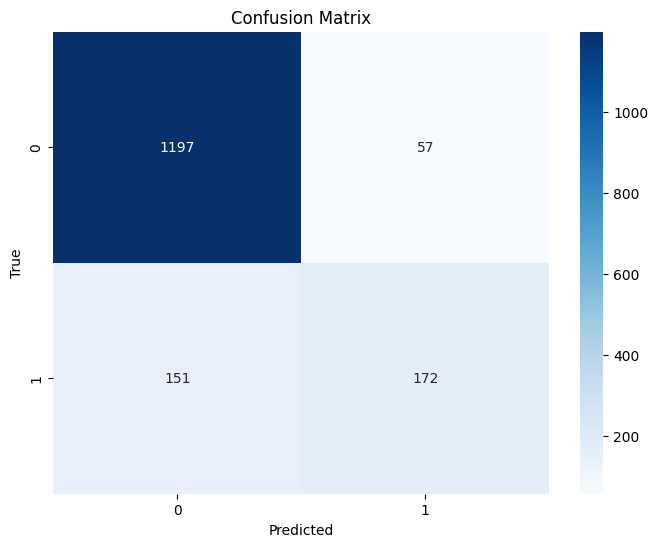

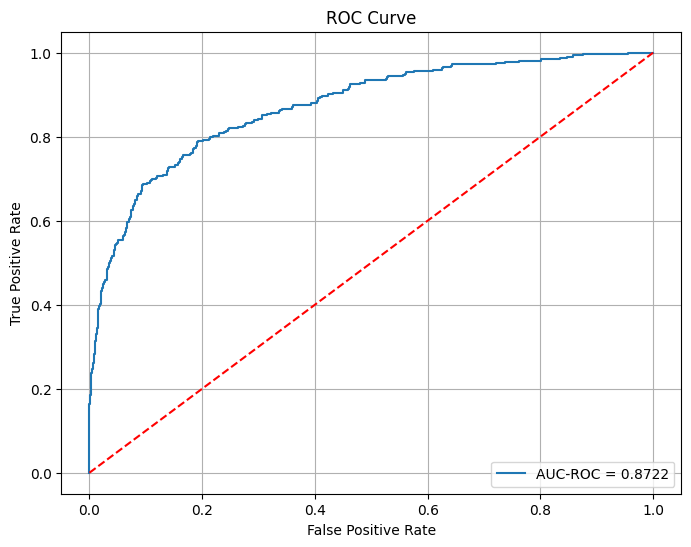

In [32]:
# Logistic model
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(max_iter=1000)
lm.fit(X_train_scaled,y_train)
y_pred_lm = lm.predict(X_test_scaled)
y_prob_lm = lm.predict_proba(X_test_scaled)[:, 1]
print_plot(lm, y_pred_lm, y_prob_lm)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1254
           1       0.75      0.53      0.62       323

    accuracy                           0.87      1577
   macro avg       0.82      0.74      0.77      1577
weighted avg       0.86      0.87      0.86      1577



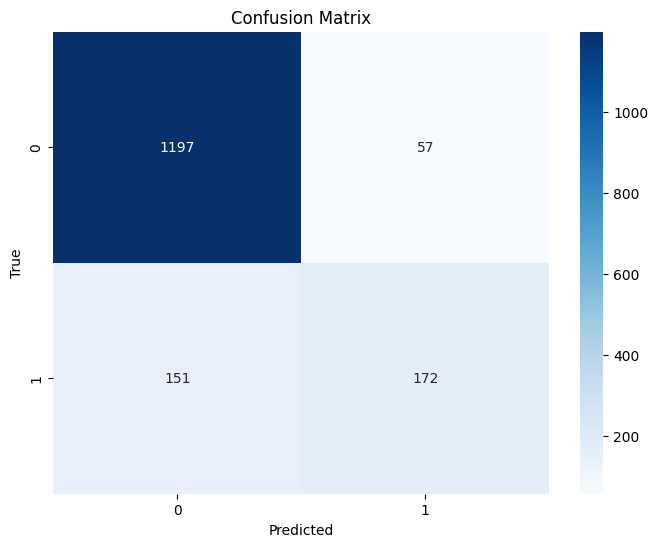

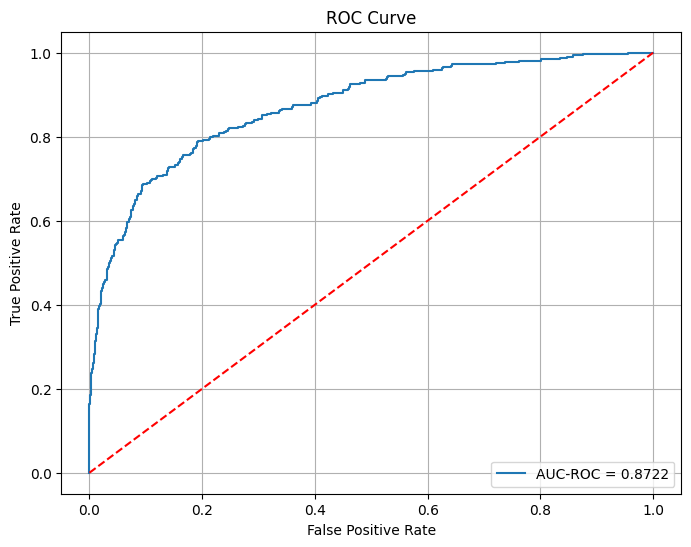

LogisticRegression None
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1254
           1       0.95      0.66      0.78       323

    accuracy                           0.92      1577
   macro avg       0.94      0.82      0.87      1577
weighted avg       0.93      0.92      0.92      1577



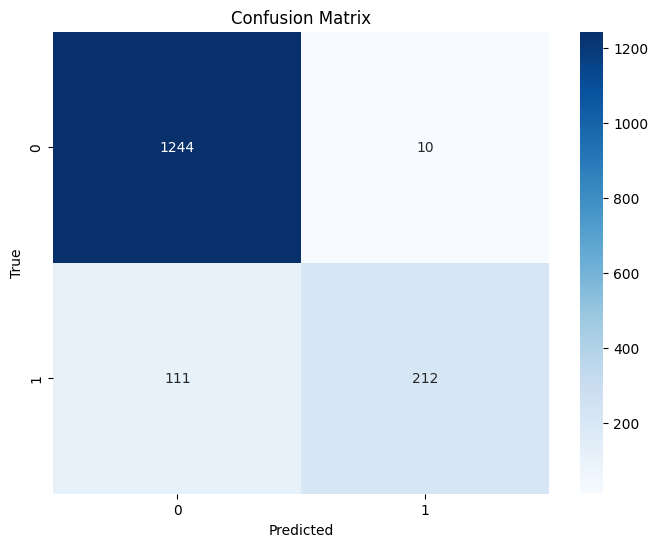

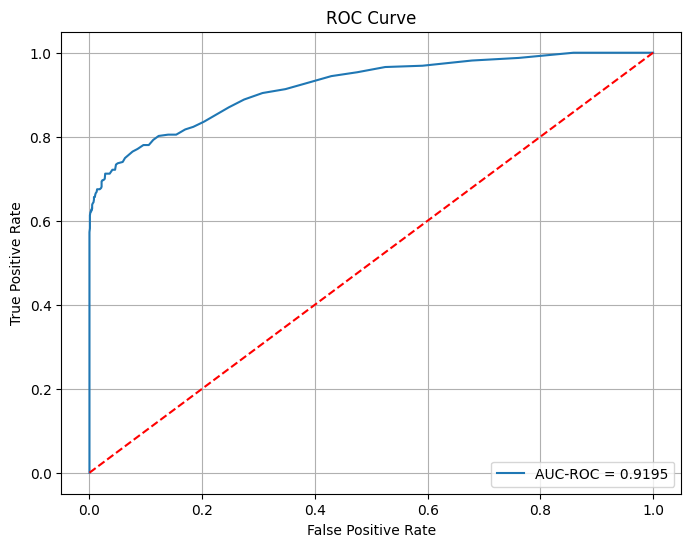

RandomForestClassifier None
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1254
           1       0.96      0.60      0.74       323

    accuracy                           0.91      1577
   macro avg       0.93      0.80      0.84      1577
weighted avg       0.92      0.91      0.90      1577



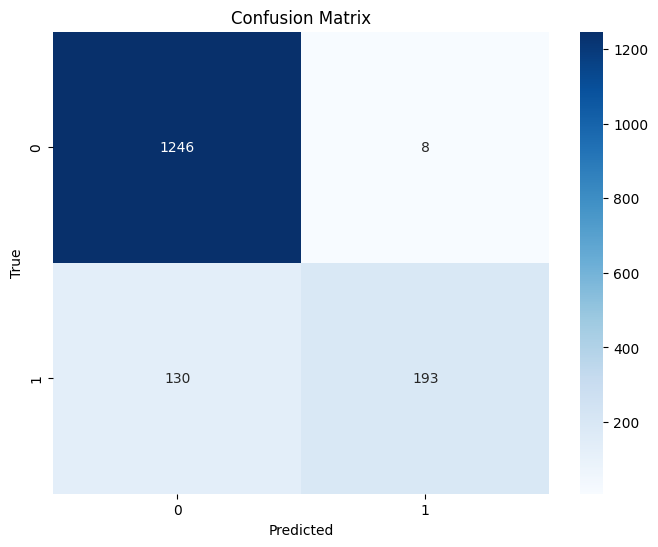

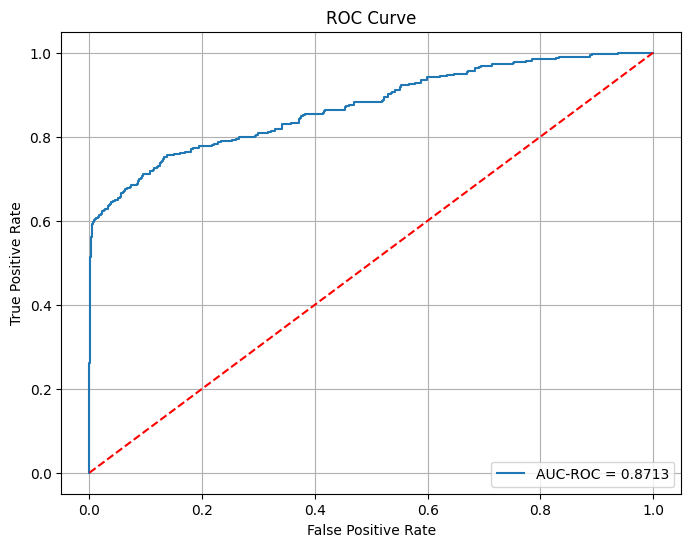

SVC None
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1254
           1       0.95      0.63      0.76       323

    accuracy                           0.92      1577
   macro avg       0.93      0.81      0.85      1577
weighted avg       0.92      0.92      0.91      1577



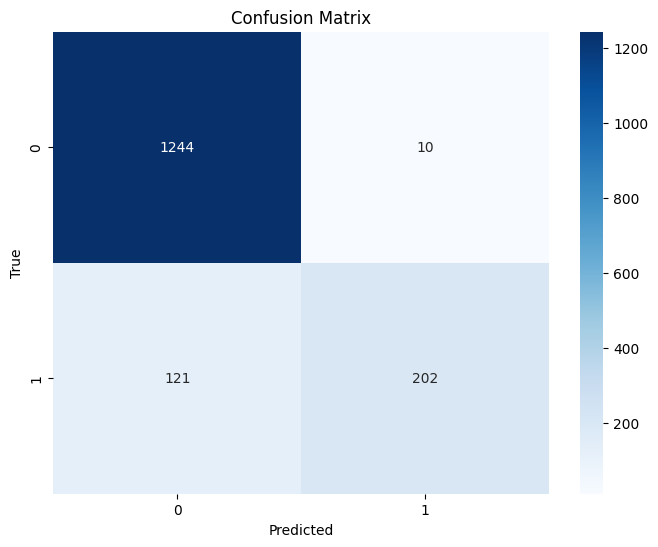

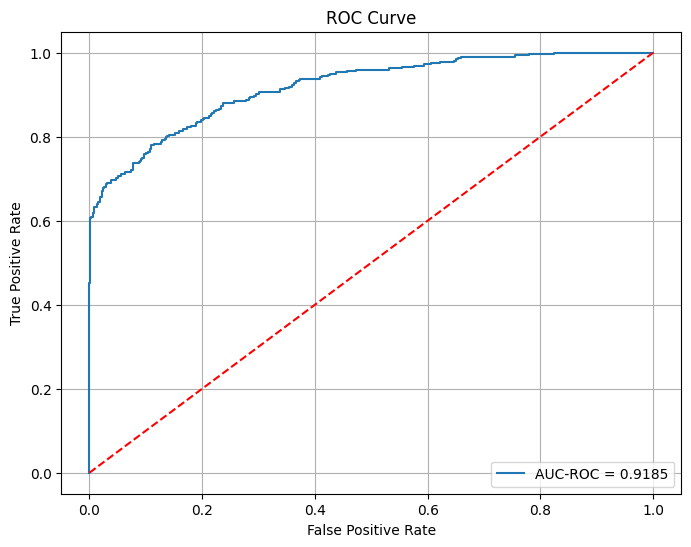

VotingClassifier None


In [35]:
#Voting classifier (soft)
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
log_clf = LogisticRegression(max_iter=1000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
estimator =[('lr', log_clf), ('rf',rnd_clf),('svc',svm_clf)]
voting_clf2 = VotingClassifier(
    estimator,
    voting= 'soft'
)
voting_clf2.fit(X_train_scaled, y_train)
for clf in (log_clf,rnd_clf,svm_clf,voting_clf2):
  clf.fit(X_train_scaled,y_train)
  y_pred_v1 = clf.predict(X_test_scaled)
  y_prob_v1 = clf.predict_proba(X_test_scaled)[:, 1]
  print(clf.__class__.__name__,print_plot(clf, y_pred_v1, y_prob_v1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1254
           1       0.85      0.57      0.68       323

    accuracy                           0.89      1577
   macro avg       0.87      0.77      0.81      1577
weighted avg       0.89      0.89      0.88      1577



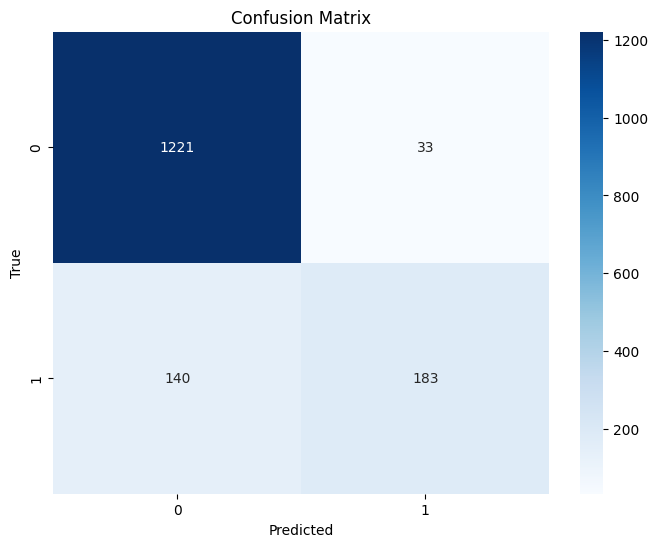

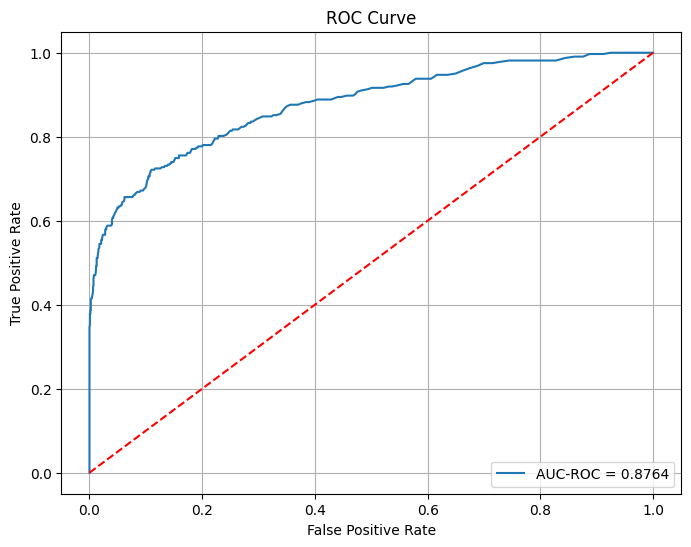

In [34]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train_scaled, y_train)
y_pred_bag = bag_clf.predict(X_test_scaled)
y_prob_bag = bag_clf.predict_proba(X_test_scaled)[:, 1]
print_plot(bag_clf, y_pred_bag, y_prob_bag)